In [1]:
# from crowd_sim import *
import gym
import time

In [2]:
from crowd_sim.envs.crowd_sim_sgan import CrowdSimSgan

/home/koksyuen/anaconda3/envs/rl/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import matplotlib.pyplot as plt
%matplotlib tk

In [ ]:
from arguments import get_args
from crowd_nav.configs.config import Config

In [ ]:
# env_id = 'CrowdSim-v0'
# env_id = 'CrowdSimVarNum-v0'
env_id = 'CrowdSimSgan-v0'

env = gym.make(env_id)

In [ ]:
env = CrowdSimSgan()

In [ ]:
env_config = Config()
env.configure(env_config)

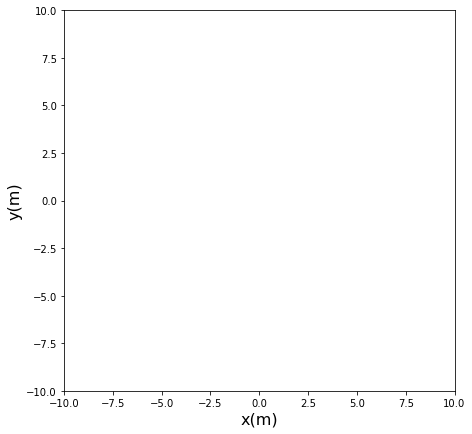

In [4]:
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot()
ax1.set_xlim(-10, 10)
ax1.set_ylim(-10, 10)
ax1.set_xlabel('x(m)', fontsize=16)
ax1.set_ylabel('y(m)', fontsize=16)

# ax2 = plt.subplot(122)

plt.ion()
plt.show()

In [ ]:
env.setup(seed=10, num_of_env=1, ax=ax1)

In [ ]:
episodes = 5
for episode in range(1, episodes+1):
    state = env.reset()
    # ax2.imshow(state['local_map'], cmap='gray')
    done = False
    score = 0 
    avg_time = 0
    step = 0
    
    while not done:
        env.render()
        action = (0.1, 0.01)
        start_time = time.time()
        n_state, reward, done, info = env.step(action)
        end_time = time.time()
        avg_time += (end_time - start_time)
        step += 1
        # ax2.imshow(n_state['local_map'], cmap='gray')
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
    print('average step time ({} steps): {}s'.format(step, avg_time/step))
env.close()

In [ ]:
import seaborn as sns

cmap = sns.color_palette("gray", 256)

sns.heatmap(n_state['local_map'], cmap=cmap)

In [ ]:
n_state['local_map']

In [ ]:
n_state['local_map'].shape

In [ ]:
env.close

In [ ]:
n_state.shape[1]

In [ ]:
sgan_path = '/home/koksyuen/python_project/sgan'
model_path = '/models/sgan-p-models/eth_8_model.pt'
full_path = sgan_path + model_path

In [ ]:
full_path

In [ ]:
import sys
# setting path
sys.path.append('/home/koksyuen/python_project/sgan')

from predictor import socialGAN

In [ ]:
traj_predictor = socialGAN(model_path='/home/koksyuen/python_project/sgan/models/sgan-p-models/eth_8_model.pt')

In [ ]:
pred = traj_predictor(n_state)

In [ ]:
pred.shape

In [ ]:
pred

In [ ]:
from stable_baselines3.common.env_checker import check_env

In [ ]:
check_env(env, warn=True)

In [ ]:
import numpy as np

In [ ]:
a = np.zeros((6, 2))

In [ ]:
b = np.array((1., 2., 5.))

In [ ]:
b

In [ ]:
a[:-1,:] = b[:2]

In [ ]:
import numpy as np

In [ ]:
a = [True, True, False]
aa = np.array(a)

In [ ]:
b = np.array([5, 6, 7])

In [ ]:
aa.shape

In [ ]:
aa[True].shape

In [ ]:
aa[0]

In [ ]:
b[aa].shape

In [ ]:
for i in range(10):
    print(i)

In [ ]:
import numpy as np

In [ ]:
np.ceil(2.5)

In [ ]:
a = np.array(['happy', 'normal', 'angry'])
b = np.array([True, False, True])
a[b]

In [ ]:
traj = np.array([[[2, 3], [4, 5]],
                 [[2, 3], [5, 6]],
                 [[10, 11], [12, 13]],
                 [[3, 4], [6, 8]]])

map = np.zeros((10, 10), dtype=np.uint8)

In [ ]:
map[traj[0,0,0], traj[0,0,1]] = 255

In [ ]:
map

In [ ]:
traj[0,0]